# CUSTOMER SEGMENTATION

In today's world the variation in type pf customer can be far and wide and as such customers are always seeking personalised services.As a result, businesses need to be able to segment their customer base into clusters and tailor an experience for each customer segment. This is an area where machine learning and data science are beginnning to make a difference in the industry by understanding the different variants of customers and helping businesses offer more personalised services. Let’s learn how businesses are able to personalize experiences with customer segmentation

In [239]:
#Import pandas
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [240]:
#Load in ecommerce data
df = pd.read_csv('ecommerce_data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email


In [241]:
#Check number of rows in dataset
len(df)

541909

In [242]:
#Check the number of unique customers in the dataset
len(df['CustomerID'].unique())

4373

In [243]:
#Calculate number of rows in data with null values
len(df) - len(df.dropna())

135080

In [244]:
#Check how many null values are present in every column
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
channel             0
dtype: int64


In [245]:
#Drop all null values
df = df.dropna()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email


In [246]:
#Check number of rows after dropping all null values
len(df)

406829

In [247]:
#Drop Invoice number and Stock code column
df.drop(['InvoiceNo','StockCode'],axis=1,inplace=True)
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email


In [248]:
#write function to change description column from upper to lower case and remove punctuations
import re
def clean(Description):
    return re.sub(r'[^\w\s]','',Description).lower()

In [249]:
#Clean Description column 
df['Description'] = df['Description'].apply(clean)
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email


In [250]:
#Reset index to re-arrange after dropping null values
df = df.reset_index().drop('index',axis=1)

In [251]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email


In [252]:
#Calculate total amount spent by a customer on a product and put into new Column
df['Amount Total'] = df['UnitPrice'] * df['Quantity']
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel,Amount Total
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email,15.30
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email,20.34
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email,22.00
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email,20.34
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email,20.34


In [253]:
#Create a vectorizer with English stopwords and apply to dataset
vectorizer = CountVectorizer(stop_words='english')
descriptions = vectorizer.fit_transform(df['Description'])
descriptions

<406829x2093 sparse matrix of type '<class 'numpy.int64'>'
	with 1640936 stored elements in Compressed Sparse Row format>

In [254]:
#Create 5 clusters for the different products sold
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(descriptions)

KMeans(n_clusters=5)

In [255]:
#Categorise products into the different clusters formed and create a new column Product with the cluster designation for each product
df['Product'] = kmeans.labels_
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,channel,Amount Total,Product
0,white hanging heart tlight holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Email,15.30,1
1,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email,20.34,1
2,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Email,22.00,1
3,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email,20.34,1
4,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Email,20.34,1


In [256]:
#Create a dataframe with rows representing unique customers
customers = pd.DataFrame({'CustomerID':df['CustomerID'].unique()})
customers.head()

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0


In [257]:
#Add columns of different product clusters
customers['Product0'] = 0
customers['Product1'] = 0
customers['Product2'] = 0
customers['Product3'] = 0
customers['Product4'] = 0
customers.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4
0,17850.0,0,0,0,0,0
1,13047.0,0,0,0,0,0
2,12583.0,0,0,0,0,0
3,13748.0,0,0,0,0,0
4,15100.0,0,0,0,0,0


In [258]:
#Create for each unique customer the total amount purchased in each product cluster
for index in tqdm(range(len(df))):
    customerID = df.loc[index,'CustomerID']
    product_category = df.loc[index,'Product']
    product_price = df.loc[index,'Amount Total']
    customers_table_index = customers[customers['CustomerID']==customerID].index[0]
    customers.loc[customers_table_index, 'Product'+str(product_category)] += product_price

100%|██████████| 406829/406829 [05:09<00:00, 1314.09it/s]


In [259]:
customers.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4
0,17850.0,321.30,4882.33,-11.10,-2.90,99.0
1,13047.0,518.38,2503.18,17.70,39.84,0.0
2,12583.0,1373.34,4914.28,798.62,0.00,101.1
3,13748.0,52.08,896.17,0.00,0.00,0.0
4,15100.0,0.00,635.10,0.00,0.00,0.0


In [260]:
#create customer purchase history
customers['PurchaseCount'] = 0
customers['PurchaseMin'] = 0
customers['PurchaseMax'] = 0
customers['PurchaseMean'] = 0
customers['PurchaseSum'] = 0
customers.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum
0,17850.0,321.30,4882.33,-11.10,-2.90,99.0,0,0,0,0,0
1,13047.0,518.38,2503.18,17.70,39.84,0.0,0,0,0,0,0
2,12583.0,1373.34,4914.28,798.62,0.00,101.1,0,0,0,0,0
3,13748.0,52.08,896.17,0.00,0.00,0.0,0,0,0,0,0
4,15100.0,0.00,635.10,0.00,0.00,0.0,0,0,0,0,0


In [261]:
from tqdm import tqdm
for index in tqdm(range(len(customers))):
    customerID = customers.loc[index,'CustomerID']
    history = df[df['CustomerID']==customerID]['Amount Total']
    customers.loc[index,'PurchaseCount'] = history.count()
    customers.loc[index,'PurchaseMin'] = history.min()
    customers.loc[index,'PurchaseMax'] = history.max()
    customers.loc[index,'PurchaseMean'] = history.mean()
    customers.loc[index,'PurchaseSum'] = history.sum()

100%|██████████| 4372/4372 [00:14<00:00, 305.45it/s]


In [262]:
customers.head()

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum
0,17850.0,321.30,4882.33,-11.10,-2.90,99.0,312,-30.60,107.25,16.950737,5288.63
1,13047.0,518.38,2503.18,17.70,39.84,0.0,196,-15.00,68.00,15.709694,3079.10
2,12583.0,1373.34,4914.28,798.62,0.00,101.1,251,-60.84,132.80,28.634821,7187.34
3,13748.0,52.08,896.17,0.00,0.00,0.0,28,9.36,204.00,33.866071,948.25
4,15100.0,0.00,635.10,0.00,0.00,0.0,6,-131.40,350.40,105.850000,635.10


In [263]:
customers['Foreign'] = 0

In [264]:
#Create column with representing customers from the United Kingdom and 0 for foreign customers
for index in tqdm(range(len(customers))):
    customerID = customers.loc[index,'CustomerID']
    customerCountry = df[df['CustomerID']==customerID] .reset_index().loc[0,'Country']
    if customerCountry == 'United Kingdom':
        customers.loc[index,'Foreign'] = 1

100%|██████████| 4372/4372 [00:08<00:00, 498.43it/s]


In [265]:
#Scale data to produce uniform clusters(prevent influence of outliers)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_customers = scaler.fit_transform(customers)

In [266]:
scaled_customers = pd.DataFrame(scaled_customers, columns=customers.columns)
scaled_customers

,CustomerID,Product0,Product1,Product2,Product3,Product4,PurchaseCount,PurchaseMin,PurchaseMax,PurchaseMean,PurchaseSum,Foreign
0,1.480857,0.113377,0.592029,-0.200845,-0.108838,-0.059417,0.941929,0.019410,-0.027050,-0.093381,0.412510,0.326857
1,-1.308028,0.291646,0.191847,-0.157505,-0.030743,-0.154512,0.442886,0.024834,-0.040674,-0.103129,0.143658,0.326857
2,-1.577452,1.065000,0.597403,1.017670,-0.103539,-0.057400,0.679501,0.008896,-0.018181,-0.001604,0.643541,-3.059443
3,-0.900989,-0.130145,-0.078458,-0.184142,-0.103539,-0.154512,-0.279865,0.033304,0.006533,0.039487,-0.115620,0.326857
4,-0.115944,-0.177254,-0.122371,-0.184142,-0.103539,-0.154512,-0.374511,-0.015637,0.057349,0.604912,-0.153723,0.326857
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,-1.082153,-0.177254,-0.196079,-0.184142,-0.103539,-0.154512,-0.348699,0.033596,-0.055426,-0.097648,-0.207044,0.326857
4368,0.127931,-0.177254,-0.220215,-0.184142,0.426534,-0.154512,-0.322886,0.033346,-0.052239,-0.076630,-0.189205,0.326857
4369,-1.162284,-0.177254,-0.168644,-0.184142,-0.103539,-0.154512,-0.391720,0.061343,0.029442,1.187352,-0.187197,0.326857
4370,-0.424272,-0.164726,-0.193279,-0.184142,-0.103539,-0.154512,-0.348699,0.030624,-0.021791,-0.077684,-0.203333,0.326857


In [267]:
#Create 6 K mean models to identify which number of clusters has the best silhouette score

cluster_nums = [2,3,4,5,6,7]
scores = []
for cluster_num in cluster_nums:
    kmeans = KMeans(cluster_num)
    kmeans.fit(scaled_customers)
    clusters = kmeans.predict(scaled_customers)
    silhouette = silhouette_score(scaled_customers, clusters)
    scores.append(silhouette)

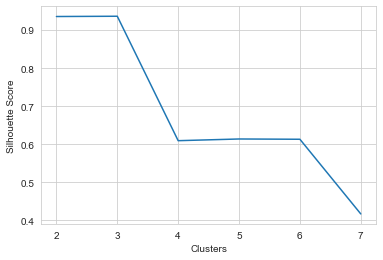

In [268]:
#Plot graph of cluster/silhouette score
sns.set_style('whitegrid')
plt.ylabel('Silhouette Score')
plt.xlabel('Clusters')
sns.lineplot(x=cluster_nums,y=scores)

In [279]:
kmeans = KMeans(3)
kmeans.fit(scaled_customers)

KMeans(n_clusters=3)

In [280]:
kmeans.cluster_centers_

array([[-3.80493907e-05, -3.11821181e-02, -3.14977014e-02,
        -2.71076244e-02, -2.08475121e-02, -1.50470992e-02,
        -1.10579659e-02,  2.03647535e-02, -2.11993230e-02,
        -2.42115588e-03, -3.24661080e-02,  2.43032001e-03],
       [ 1.73637008e-01,  1.94860129e+01,  1.96974824e+01,
         1.69484069e+01,  1.30235390e+01,  9.42278832e+00,
         7.00296290e+00, -4.99816459e-01,  1.05045720e+00,
         1.57298034e+00,  2.03016112e+01, -1.60817143e+00],
       [-5.24724782e-01, -1.77254405e-01, -2.28952931e-01,
        -1.84141521e-01, -1.03538885e-01, -1.54512301e-01,
        -3.87417609e-01, -4.26763521e+01,  4.25697229e+01,
        -2.23679645e-01, -2.30824555e-01,  3.26856915e-01]])

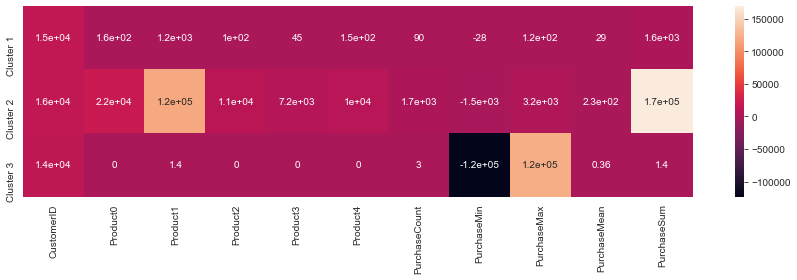

In [285]:
plt.figure(figsize=(15,3.5))
sns.heatmap(scaler.inverse_transform(kmeans.cluster_centers_)[:,0:11],annot=True,yticklabels=['Cluster 1','Cluster 2', 'Cluster 3'],xticklabels=scaled_customers.columns.drop('Foreign'))

# BUSINESS INSIGHTS

There are 3 customer segments
Customer segment 1 buys evenly across all categories but purchases most from Product category 1. They purchase on average 90 times and returns at most $28 of its purchases. The average purchase amount in this category is $29. this seems to be a category with a stable customer base which frequently purchases from the company. They represent a good target for promotional and referral offers.

Customer segment 2 purchases most from Product category 1 as well however they purchase more in quantity both in Product category one and all other categories. They purchase on average 1700 times and return at most $1500 of it's purchases. The average purchase amount in this group is $230. By looking into the most prominent vocabulary in each of the 5 product groups, we can get a feel for which product this customer segments buy more in which areas. They are the most frequent buyers and purchase items of the highest value and should be the primary focus for customer retention and marketing offers

Customer segment 3 purchases the least amount of product with a few in Product category 1. They purchase on average 3 times and return a staggering amount of $120000. They purchase the least amount on average and likely represent the smallest number of customers. They potentially are first time customers and attention should be paid on ways to better retain them.

Product Category 1 should also be emphasized more on the webpage since it's the category with the most purchases.